In [22]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [23]:

# Función para calcular la derivada y determinar si es real o compleja
def calcular_derivada(funcion, variable, punto_evaluacion):
    # Calcular la derivada simbólica
    derivada = sp.diff(funcion, variable)
    
    # Comprobar si la derivada es real o compleja
    es_real = all(sp.im(derivada).simplify() == 0)  # Verifica si la parte imaginaria es cero
    
    if es_real:
        # Si la derivada es real, evalúala en el punto de evaluación para obtener un número real
        valor_real = derivada.subs(variable, punto_evaluacion)
        return valor_real
    else:
        # Si la derivada es compleja, devuélvela como expresión compleja
        return derivada

In [24]:
# Función f(x)
def f(x):
    return 3 * x**5 - 3 * x**3 - 36 * x

# Derivada de f(x) f'(x)
def df(x):    
    return 15 * x**4 - 9 * x**2 - 36    

#raiz de la recta tangente
def raiztangente(x):    
    return x - ( (f(x)) / (df(x)) )

#Error normalizado porcentual recibe el valor actual y el valor anterior
def ERNP (va,van): 
    return ( (np.abs(va-van)) / va) * 100


In [25]:
def newton_raphson(x0, tol=1e-6,max_iter=100):
    i = 0
    x = complex(x0,0)
    x1 = raiztangente(x)

    while i<max_iter:
        x = x1
        x1 = raiztangente(x)
        if ERNP(x,x1) < tol:
            return x1        
        i+= 1
    raise Exception("El método de Newton-Raphson no convergió después de {} iteraciones".format(max_iter))

In [34]:
raiz =newton_raphson(complex(1,1))
raiz

(2.6536439134151532e-05-9.781579219855785e-05j)

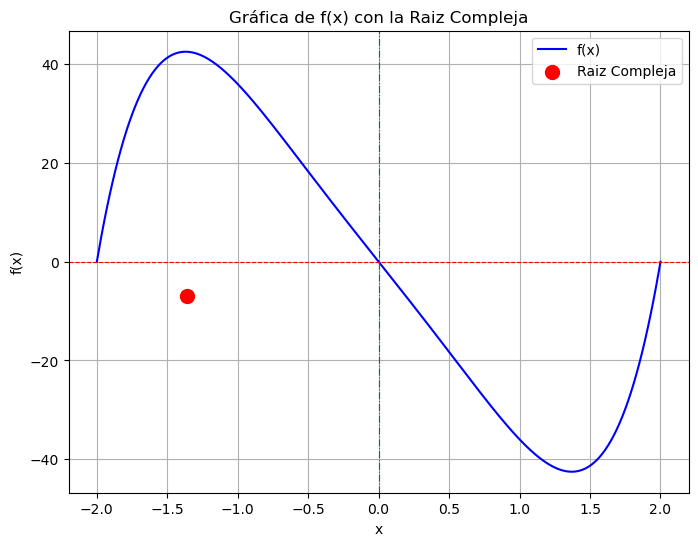

In [33]:
# Rango de valores en el eje x
x_range = np.linspace(-2, 2, 400)

# Calcula los valores de f(x) en el rango
y_values = f(x_range)

# Grafica f(x)
plt.figure(figsize=(8, 6))
plt.plot(x_range, y_values, label='f(x)', color='blue')

# Marca la raíz compleja encontrada en la gráfica
plt.scatter([raiz.real], [raiz.imag], color='red', label='Raiz Compleja', marker='o', s=100)

# Configura etiquetas y leyenda
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='red',linestyle="--" , linewidth=0.8)
plt.axvline(0, color='green',linestyle="-." ,linewidth=0.8)
plt.legend()

# Muestra la gráfica
plt.title('Gráfica de f(x) con la Raiz Compleja')
plt.grid(True)
plt.show()

In [46]:

import sympy as sp

# Valor inicial complejo de x
x0_real = 1
x0_imag = 1
x0 = x0_real + x0_imag * sp.I

# Define la variable simbólica x
x = sp.symbols('x')

# Define la función f(x)
funcion = 3 * x**5 - 3 * x**3 - 36 * x

# Calcula la derivada de f(x) con respecto a x
derivada = sp.diff(funcion, x)

# Convierte la derivada en una función que puede ser evaluada
derivada_func = sp.lambdify(x, derivada, 'numpy')
func = sp.lambdify(x, funcion, "numpy")

# Número máximo de iteraciones
max_iter = 100

# Valor de tolerancia
tol = 1e-6

# Iteración
i = 0

while i < max_iter:
    x1 = x0 - func(x0) / derivada_func(x0)
    
    if abs(x1 - x0).evalf() < tol:  # Convierte la diferencia a número decimal
        print("Raíz aproximada:", x1.evalf())
        break
    
    x0 = x1
    i += 1
else:
    raise Exception("El método de Newton-Raphson no convergió después de {} iteraciones".format(max_iter))


TypeError: Invalid comparison of non-real 0.700404195972475 + 6.32615995203805e-26*I

-36 - 9*(2.0 + 1.0*I)**2 + 15*(2.0 + 1.0*I)**4